In [28]:
import os
from pathlib import Path
import numpy as np
import pickle
import matplotlib.animation as manimation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [29]:
path = 'G:\\My Drive\\SHI\\2024' 
os.chdir(path)

In [30]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]
files

['Motivation.gdoc',
 'Research Synergy.gdoc',
 'Sustainable Research Pathways Summer 2024 Project Plan - Faculty.gdoc',
 'Sustainable Research Pathways Summer 2024 Project Plan - Faculty.docx',
 'RW.pdf',
 '10.03-Gaussian-Process-Regression.ipynb',
 'DEBUG_NOTES.txt',
 'SHI 10th Anniversary story.txt',
 'SHI 10th Anniversary story.txt.bak',
 'tags.ipynb',
 'tags.db',
 'FY25 Computing Sciences Area LDRD Proposal Trebotich.docx',
 'FY25 Computing Sciences Area LDRD Proposal Trebotich (1).docx',
 '~$25 Computing Sciences Area LDRD Proposal Trebotich.docx',
 'FlowGCN_Trebotich.docx',
 'C.Paolini 2024 Offer Letter.pdf',
 'Fax Guidance for External Parties.pdf',
 'W8ben Form.pdf',
 'W9 Form.pdf',
 'crunchhdf5view.ipynb',
 'plot.nx512.step0004000.2d.hdf5',
 'patch_diagram.drawio.png',
 'mash.ipynb',
 'mesh.ipynb',
 'crunchhdf5view_copy.ipynb',
 'plot.nx128.step0000544.2d.hdf5',
 '2023 About Me Slide and Zoom background.pptx',
 '2024 About Me Paolini.gslides',
 'plot.nx128.step0000624.2d.hdf5'

In [31]:
objects = []
with (open("patches.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [32]:
a = objects[0]

In [33]:
a.shape

(87080, 8)

In [34]:
h = 0.02  # step size in the mesh
x_min = 0.0
x_max = 1.0
y_min = 0.0
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [35]:
a.shape

(87080, 8)

In [110]:
X = np.unique(a[:,0]).reshape(-1, 1)
print(f'X: {X.shape}')
Y = np.empty((X.shape[0],2))
print(f'Y: {Y.shape}')
stepMin = 113
stepMax = 500 # 500 #600
file = r"C:\Users\paoli\Downloads\origins.mp4"
path = Path(file)
if path.is_file():
    os.remove(file)
FFMpegWriter = manimation.writers["ffmpeg"]
metadata = dict(title="Patches", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
colors = ["r", "b", "g", "y", "m", "c"]
ax = fig.add_subplot(111)
frames=stepMax-stepMin+1

#A = a[a[:,7].argsort()[:-1]]
with writer.saving(fig, file, frames):
    for step in range(X.shape[0]):
        if stepMin <= step <= stepMax:
            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.grid(True)
            plt.xlim(0.0, 1.0)
            plt.ylim(0.0, 0.5)
            plt.grid(visible=True)
            condition = (a[:,0] == step)
            A = a[condition,1:4]
            condition = (A[:,0] == 1) # only level 1 boxes
            A = A[condition,1:3]
            for origin in range(A.shape[0]):
                print(f'{origin}: step {A[origin,0]}: {A[origin,1]}')
                plt.scatter(A[origin,0], A[origin,1], color = 'blue')
            writer.grab_frame()
            print(f'wrote step {step}')
            plt.clf()
        
writer.finish()

X: (1001, 1)
Y: (1001, 2)
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 113
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 114
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 115
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 116
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 117
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 118
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 119
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 120
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 121
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 122
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375
wrote step 123
0: ste

<Figure size 2000x1000 with 0 Axes>

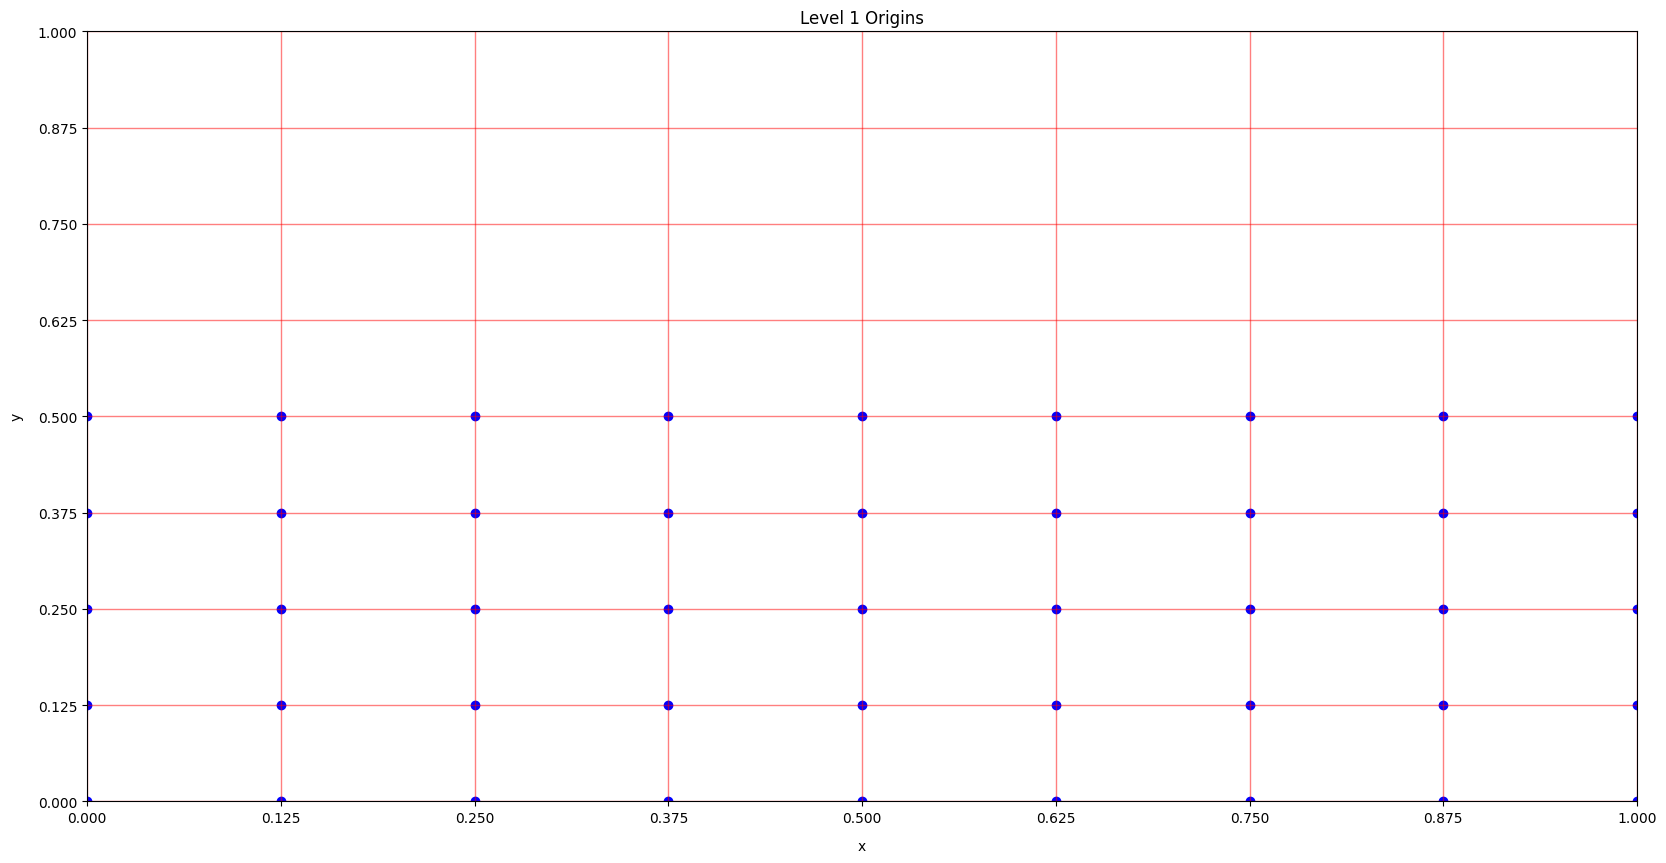

In [38]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
plt.show()


In [39]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))

rows = xx.shape[0]
cols = xx.shape[1]
X = np.empty((rows * cols, 2))
print(X.shape)
y = np.zeros(rows * cols, dtype=int)


data = np.unique(a[:,0]).reshape(-1, 1)
print(f'data: {data.shape}')
#Y = np.empty((X.shape[0],2))
#print(f'Y: {Y.shape}')

stepMin = 113
stepMax = 113 # 500 #600
i = 0
for step in range(data.shape[0]):
    if stepMin <= step <= stepMax:
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            #print(f'{origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,1] * NCOLS + A[origin,0]}')
            offset2 = int(A[origin,1]/h * cols + A[origin,0]/h)
            #offset3 = int(step + N3 * (A[origin,0]/h + N2 * A[origin,1]/h))
            #print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2}, 3D offset {offset3}')
            #XX = np.append(XX,i)
            #yy = np.append(yy,offset3)
            y[offset2] = 1
            i += 1

(45, 2)
data: (1001, 1)


In [40]:
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

0
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
(45, 2)
x_i 4, 0: step 1000, origin (0.0, 0.0)
x_i 4, 1: step 1000, origin (0.0, 0.125)
x_i 4, 2: step 1000, origin (0.0, 0.25)
x_i 4, 3: step 1000, origin (0.0, 0.375)
1
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=[1, 1]))
(45, 2)
x_i 4, 0: step 1000, origin (0.0, 0.0)
x_i 4, 1: step 1000, origin (0.0, 0.125)
x_i 4, 2: step 1000, origin (0.0, 0.25)
x_i 4, 3: step 1000, origin (0.0, 0.375)


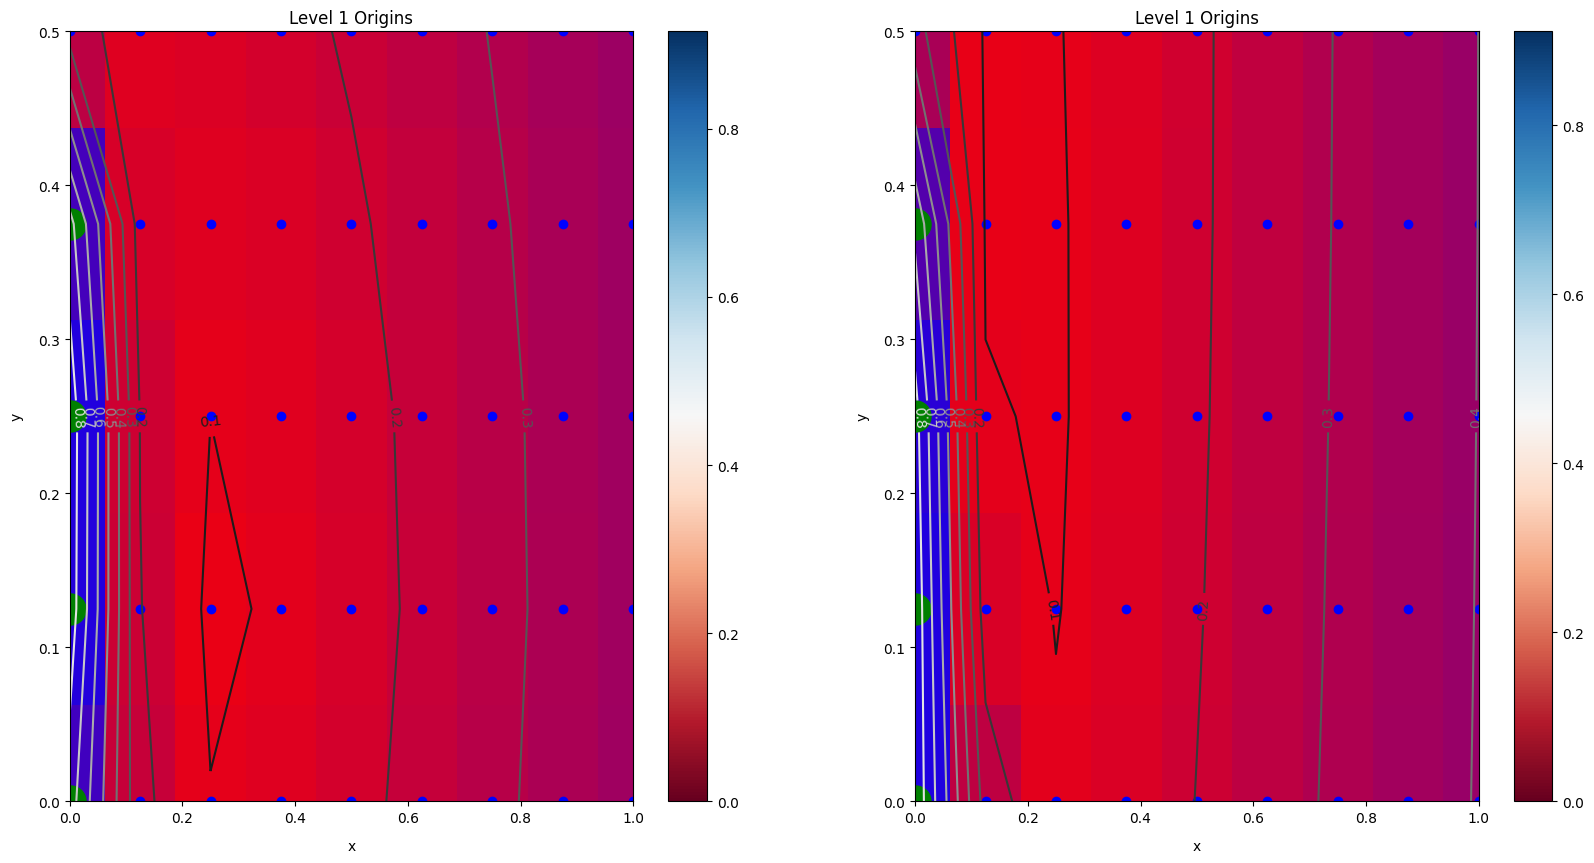

In [41]:
fig = plt.figure(figsize=(20,10))
'''
#ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
#plt.show()
'''
for k, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    print(k)
    print(clf)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    print(Z.shape)
    Z = Z.reshape((xx.shape[0], xx.shape[1], 2))


    #print(f'xx: {xx.shape}')
    #print(f'yy: {yy.shape}')
    #print(f'Z: {Z.shape}')

    pad = np.zeros((xx.shape[0], xx.shape[1], 1))
    #print(f'pad: {pad.shape}')

    #ZZ = np.append(Z,pad,axis=2)
    ZZ = np.dstack((Z,pad))
    ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]



    #print(f'ZZ: {ZZ.shape}')
    


    plt.subplot(1, 2, k + 1)
    plt.xlabel("x",labelpad=10)
    plt.ylabel("y",labelpad=10)
    plt.title(f"Level 1 Origins")
    #plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    major_ticks = np.arange(x_min, x_max+h, h)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    


    # pcolormesh needs the pixel edges for x and y
    # and with default flat shading, Z needs to be evaluated at the pixel center
    plot = plt.pcolormesh(xx, yy, ZZ, cmap='RdBu', shading='nearest')
    plt.scatter(xx,yy, color = 'blue')
    ax.grid(color='b', linestyle='-', linewidth=2, alpha=0.9)
    for origin in range(A.shape[0]):
        print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]})')
        plt.scatter(A[origin,0], A[origin,1], c="g", marker='o', s=500)
    # contour needs the centers
    cset = plt.contour(xx, yy, Z[:,:,1], cmap='gray')
    plt.clabel(cset, inline=True)

    plt.colorbar(plot)

plt.show()


data: (1001, 1)
training: 0: step 200, origin (0.09375, 0.0), 2D offset 0
training: 1: step 200, origin (0.09375, 0.125), 2D offset 9
training: 2: step 200, origin (0.09375, 0.25), 2D offset 18
training: 3: step 200, origin (0.09375, 0.375), 2D offset 27
inferencing: 0: step 200, origin (0.09375, 0.0)
inferencing: 1: step 200, origin (0.09375, 0.125)
inferencing: 2: step 200, origin (0.09375, 0.25)
inferencing: 3: step 200, origin (0.09375, 0.375)
wrote step 200
training: 0: step 201, origin (0.09375, 0.0), 2D offset 0
training: 1: step 201, origin (0.09375, 0.125), 2D offset 9
training: 2: step 201, origin (0.09375, 0.25), 2D offset 18
training: 3: step 201, origin (0.09375, 0.375), 2D offset 27
inferencing: 0: step 201, origin (0.09375, 0.0)
inferencing: 1: step 201, origin (0.09375, 0.125)
inferencing: 2: step 201, origin (0.09375, 0.25)
inferencing: 3: step 201, origin (0.09375, 0.375)
wrote step 201
training: 0: step 202, origin (0.09375, 0.0), 2D offset 0
training: 1: step 202, o

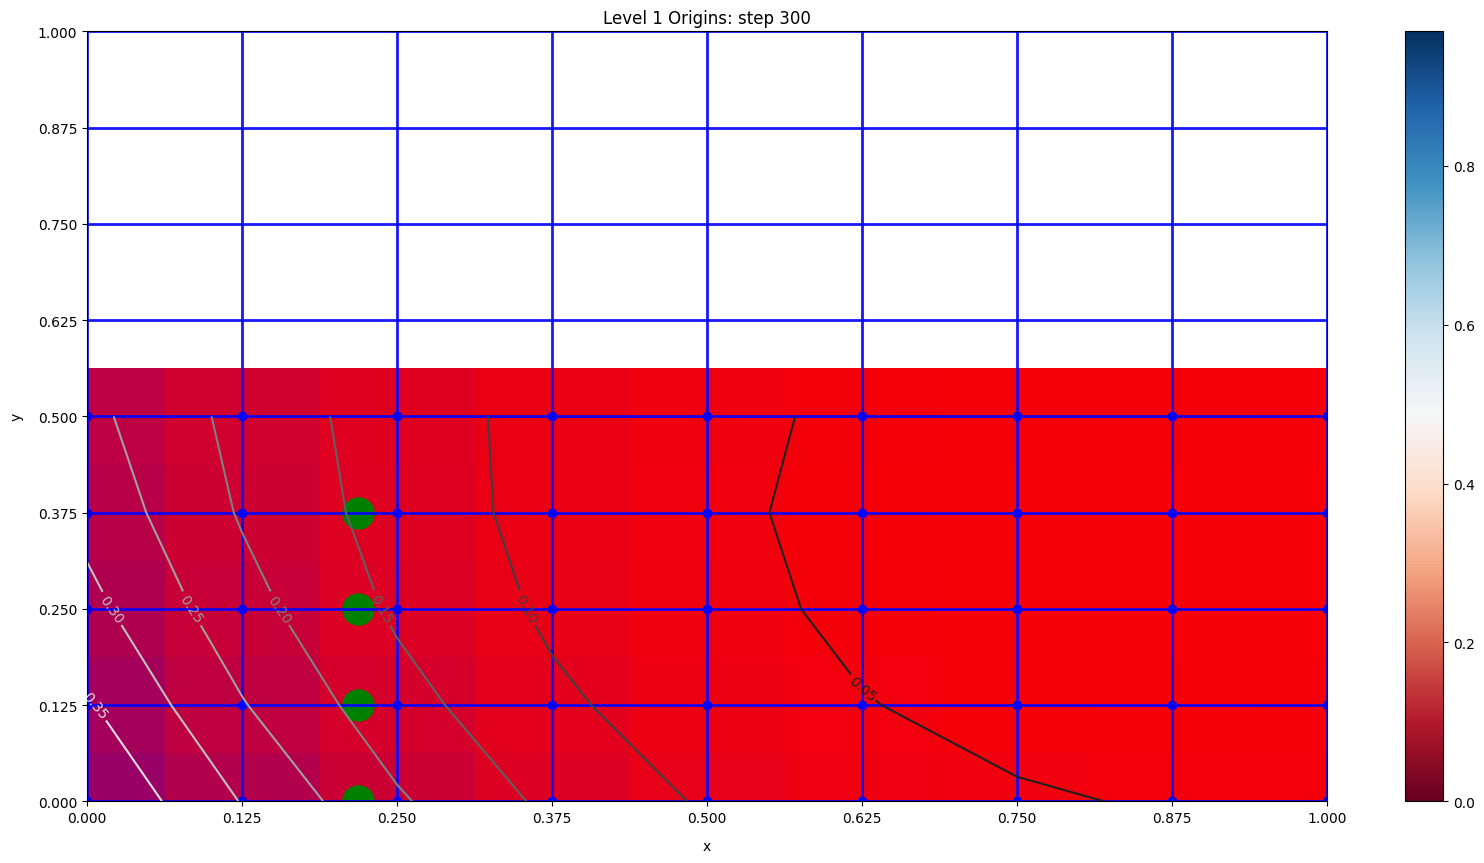

In [116]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))
rows = xx.shape[0]
cols = xx.shape[1]
data = np.unique(a[:,0]).reshape(-1, 1)
pad = np.zeros((xx.shape[0], xx.shape[1], 1))
X = np.empty((rows * cols, 2))
print(f'data: {data.shape}')
stepMin = 200
stepMax = 300 #500 #600
file = r"C:\Users\paoli\Downloads\rbf_isotropic_2.mp4"
path = Path(file)
if path.is_file():
    os.remove(file)
FFMpegWriter = manimation.writers["ffmpeg"]
metadata = dict(title="rbf_isotropic", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
major_ticks = np.arange(x_min, x_max+h, h)
ax = fig.add_subplot(111)
colors = ["r", "b", "g", "y", "m", "c"]
frames=stepMax-stepMin+1

with writer.saving(fig, file, frames):
    for step in range(data.shape[0]):
        if stepMin <= step <= stepMax:
            y = np.zeros(rows * cols, dtype=int)
            plt.clf()
            condition = (a[:,0] == step)
            A = a[condition,1:4]
            condition = (A[:,0] == 1) # only level 1 boxes
            A = A[condition,1:3]
            for origin in range(A.shape[0]):
                offset2D = int(A[origin,1]/h * cols + A[origin,0]/h)
                print(f'training: {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2D}')
                #X[int(A[origin,0]),int(A[origin,1])] = 1
                y[offset2D] = 1
            
            kernel = 1.0 * RBF([1.0])
            gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
                
            Z = gpc_rbf_isotropic.predict_proba(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape((xx.shape[0], xx.shape[1], 2))
            ZZ = np.dstack((Z,pad))
            ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]

            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.axis([x_min, x_max, y_min, y_max])
            ax = plt.gca()
            ax.set_xticks(major_ticks)
            ax.set_yticks(major_ticks)
            ax.grid(which='both')
            
            plot = plt.pcolormesh(xx, yy, ZZ, cmap='RdBu', shading='nearest')
            plt.scatter(xx, yy, color = 'blue')
            ax.grid(color='b', linestyle='-', linewidth=2, alpha=0.9)

            for origin in range(A.shape[0]):
                print(f'inferencing: {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]})')
                plt.scatter(A[origin,0], A[origin,1], c="g", marker='o', s=500) # ground truth
    
            # contour needs the centers
            cset = plt.contour(xx, yy, Z[:,:,1], cmap='gray')
            plt.clabel(cset, inline=True)
            plt.colorbar(plot)
            
            writer.grab_frame()
            print(f'wrote step {step}')
        
writer.finish()

data: (1001, 1)
0: step 0.0: 0.0
1: step 0.0: 0.125
2: step 0.0: 0.25
3: step 0.0: 0.375


RuntimeError: In set_size: Could not set the fontsize (invalid ppem value; error code 0x97)

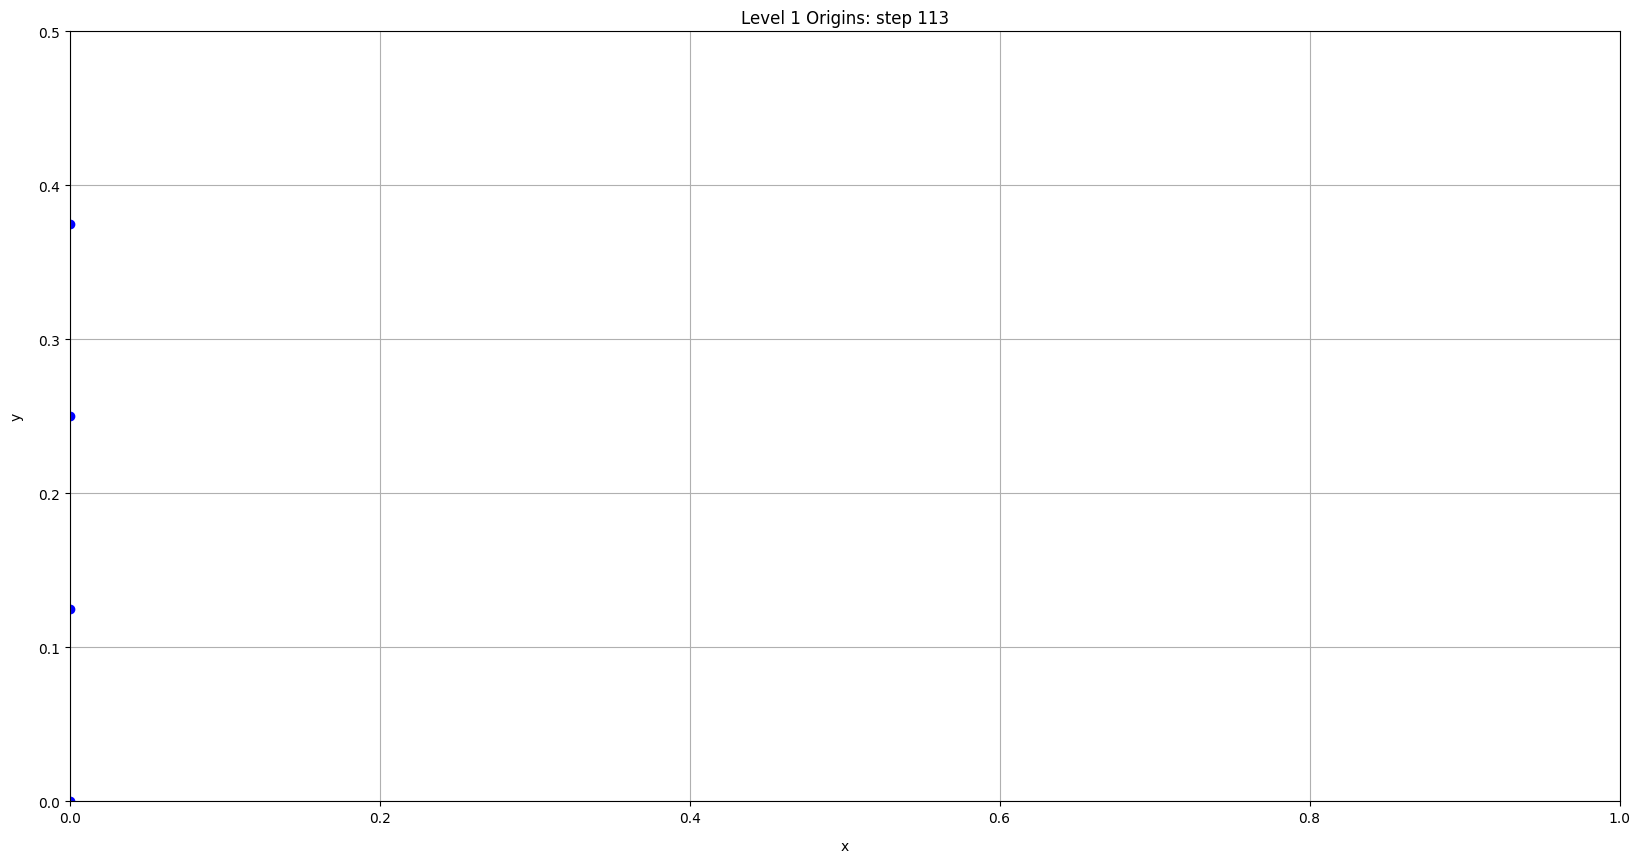

In [76]:
stepMin = 113
stepMax = 115 # 500

FFMpegWriter = manimation.writers["ffmpeg"]

file = r"C:\Users\paoli\Downloads\rbf_isotropic.mp4"
path = Path(file)
if path.is_file():
    os.remove(file)

metadata = dict(title="rbf_isotropic", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
colors = ["r", "b", "g", "y", "m", "c"]
ax = fig.add_subplot(111)
frames=stepMax-stepMin+1

pad = np.zeros((xx.shape[0], xx.shape[1], 1))
X = np.empty((rows * cols, 2))

data = np.unique(a[:,0]).reshape(-1, 1)
print(f'data: {data.shape}')
with writer.saving(fig, file, frames):
    for step in range(data.shape[0]):
        if stepMin <= step <= stepMax:
            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.grid(True)
            plt.xlim(0.0, 1.0)
            plt.ylim(0.0, 0.5)
            plt.grid(visible=True)
            condition = (a[:,0] == step)
            A = a[condition,1:4]
            condition = (A[:,0] == 1) # only level 1 boxes
            A = A[condition,1:3]
            for origin in range(A.shape[0]):
                print(f'{origin}: step {A[origin,0]}: {A[origin,1]}')
                plt.scatter(A[origin,0], A[origin,1], color = 'blue')
            writer.grab_frame()
            print(f'wrote step {step}')
            plt.clf()
        
writer.finish()
            

'''
with writer.saving(fig, file, frames):
    for step in range(stepMin, stepMax+1):
        X = np.empty((rows * cols, 2))
        y = np.zeros(rows * cols, dtype=int)
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            offset2D = int(A[origin,1]/h * cols + A[origin,0]/h)
            #print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2D}')
            #X[int(A[origin,0]),int(A[origin,1])] = 1
            #y[offset2D] = 1
            #kernel = 1.0 * RBF([1.0])
            #gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
            #Z = gpc_rbf_isotropic.predict_proba(np.c_[xx.ravel(), yy.ravel()])
            #Z = Z.reshape((xx.shape[0], xx.shape[1], 2))
            #ZZ = np.dstack((Z,pad))
            #ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]    

            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.grid(True)
            plt.xlim(0.0, 1.0)
            plt.ylim(0.0, 0.5)
            plt.grid(visible=True)

            plt.scatter(A[origin,0]/h , A[origin,1]/h , color = 'blue')

            #major_ticks = np.arange(x_min, x_max+h, h)
            #ax.set_xticks(major_ticks)
            #ax.set_yticks(major_ticks)
            #ax.grid(which='both')

        writer.grab_frame()
        print(f'wrote step {step}')
        plt.clf()
      '''  
writer.finish()
